# SparseEdges

## A bio-inspired sparse representation of edges in natural images


Table of content

* [What is the SparseEdges package?](#What-is-the-SparseEdges-package?) 
* [Installing](#Installing) 
* [testing one step](#testing-one-step)


What is the SparseEdges package?
================================

Our goal here is to build practical algorithms of sparse coding for computer vision.

The code is available @ https://github.com/bicv/SparseEdges

This class exploits the LogGabor package to provide with a sparse representation of edges in images.

This algorithm was presented in the following paper:

~~~~{.bibtex}
@inbook{Perrinet15bicv,
    author = {Perrinet, Laurent U.},
    booktitle = {Biologically-inspired Computer Vision},
    chapter = {13},
    citeulike-article-id = {13566753},
    editor = {Keil, Matthias and Crist\'{o}bal, Gabriel and Perrinet, Laurent U.},
    keywords = {anr-trax, bicv-sparse},
    posted-at = {2015-03-31 14:21:35},
    priority = {2},
    publisher = {Wiley, New-York},
    title = {Sparse models},
    year = {2015}
}
~~~~

This package gives a python implementation.

Moreover, it gives additional tools to compute useful stistics in images; first- and second order statistics of co-occurences in images.
More information is available @ http://nbviewer.ipython.org/github/bicv/SparseEdges/blob/master/SparseEdges.ipynb
Tests for the packages are available @ http://nbviewer.ipython.org/github/bicv/SparseEdges/blob/master/test-SparseEdges.ipynb.

## Installing

To install the ``SparseEdges`` class, you would need the ``LogGabor`` class (multiscale filters) which itself depends on the ``SLIP`` class (the image processing tools).

    pip install git+https://github.com/bicv/SLIP.git
    pip install git+https://github.com/bicv/LogGabor.git 
    pip install git+https://github.com/bicv/SparseEdges.git
    

But before, you need th usual depndencies, such as numpy, matplotlib, pyprind and imageio:

    pip install -U numpy matplotlib pyprind imageio


[Back to top](#SparseEdges)

In [1]:
%cd -q test
from __future__ import division, print_function
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

### Extracting edges on a sample image

We will show here how we can simply reconstruct an example image with the list of extracted edges overlaid.

First we define our object by loading default parameters from internet:

In [2]:
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
print(mp.pe)

{'white_n_learning': 0, 'do_whitening': True, 'noise': 0.33, 'N_phi': 12, 'scale_invariant': True, 'white_steepness': 4.0, 'figsize': 8.0, 'N_scale': 5, 'svm_log': False, 'd_min': 0.5, 'n_theta': 24, 'N_r': 6, 'edgematpath': 'data_cache/edges', 'svm_tol': 0.001, 'gamma_range_begin': -14, 'MP_rho': None, 'MP_alpha': 0.7, 'svm_norm': False, 'dip_w': 0.2, 'verbose': 30, 'edgefigpath': 'results/edges', 'svm_max_iter': -1, 'N_X': 256, 'loglevel_max': 7, 'white_name_database': 'serre07_distractors', 'N_Dtheta': 24, 'do_rank': False, 'N_image': None, 'white_N_0': 0.0, 'gamma_range_end': 3, 'multiscale': True, 'white_f_0': 0.4, 'svm_KL_m': 0.34, 'figsize_hist': 8, 'B_sf': 0.4, 'C_range_end': 10.0, 'N': 2048, 'line_width': 1.0, 'weight_by_distance': True, 'line_width_chevrons': 0.75, 'B_theta': 0.17453277777777776, 'matpath': 'data_cache', 'N_Y': 256, 'seed': 42, 'figsize_cohist': 8, 'base_levels': 1.618, 'mask_exponent': 3.0, 'd_width': 45.0, 'C_range_begin': -5, 'N_svm_grid': 32, 'figpath': '

At this point, we can change these parameters, by instance by using ``2048`` edges and a different value for the $\alpha$ value in matching pursuit:

In [3]:
mp.pe.N = 2048
mp.pe.MP_alpha = .9

We can now load an image and make sure to set the framework to the appropriate size:

In [4]:
# defining input image
name = 'example'
image = mp.imread('https://raw.githubusercontent.com/bicv/SparseEdges/master/database/lena256.png')
mp.set_size(image)

... then, we can initialize the algorithm and normalize the image:

In [5]:
mp.init()
image = mp.normalize(image, center=True)
print(image.mean(), image.std())

-6.18578224233e-09 0.42537239307


Then, it is easy to run matching pursuit on that image (or load a cached file with the results):

In [6]:
print(os.path.join(mp.pe.matpath, name + '.npy'))

data_cache/example.npy


In [7]:
try:
    edges = np.load(os.path.join(mp.pe.matpath, name + '.npy'))
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    

Let's summarize that in one script:

In [8]:
%%writefile experiment_example.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

An example MP run.

To run:
$ python experiment_example.py 

To remove cache:
$ rm -fr **/example*

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"


import numpy as np
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.N = 128

image = mp.imread('https://raw.githubusercontent.com/bicv/SparseEdges/master/database/lena256.png')

name = 'example'
image = mp.normalize(image, center=True)
#print image.mean(), image.std()

import os
matname = os.path.join(mp.pe.matpath, name + '.npy')
try:
    edges = np.load(matname)
except Exception:
    edges, C_res = mp.run_mp(image, verbose=True)
    np.save(matname, edges)    


Overwriting experiment_example.py


In [9]:
%run experiment_example.py

Let's show the results of the sparse edge extraction with the edges overlaid on the original image:

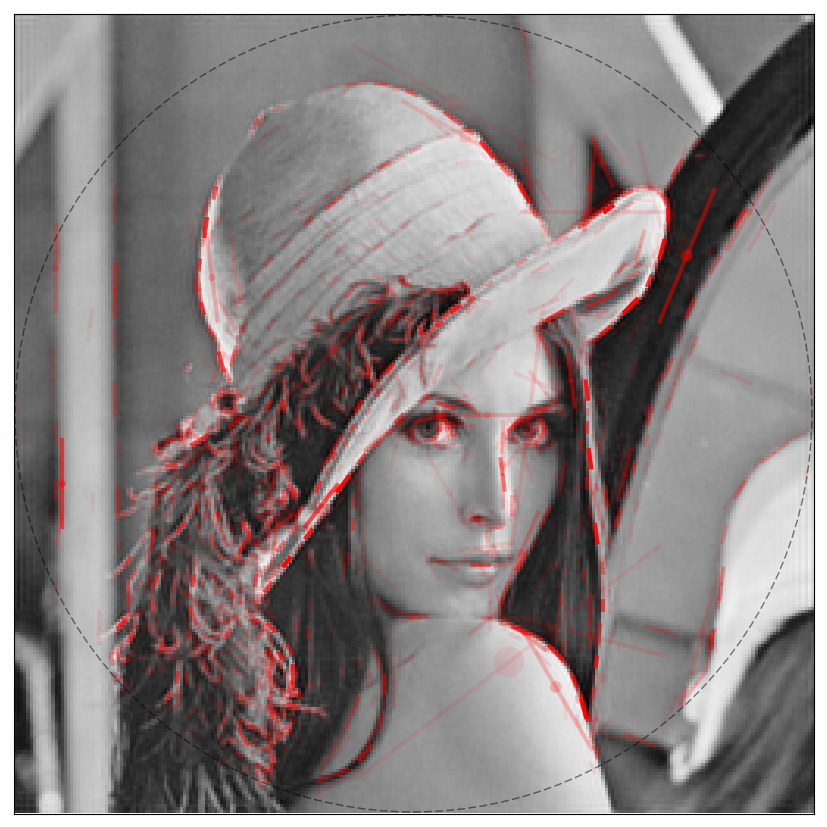

In [10]:
mp.pe.figsize_edges = 12
mp.pe.line_width = 3.
mp.pe.scale = .5

fig, a = mp.show_edges(edges, image=mp.dewhitening(mp.whitening(image)), show_phase=False, mask=True)

Note the dashed circle which (as in Geisler, 2001) shows the limit after which we discard edges. Indeed, when computing statistics (our main goal) we wish to be not perturbed by the fact that images are rectangular.

Let's show the results of the sparse edge extraction with the edges overlaid on the image reconstructed from the edges:

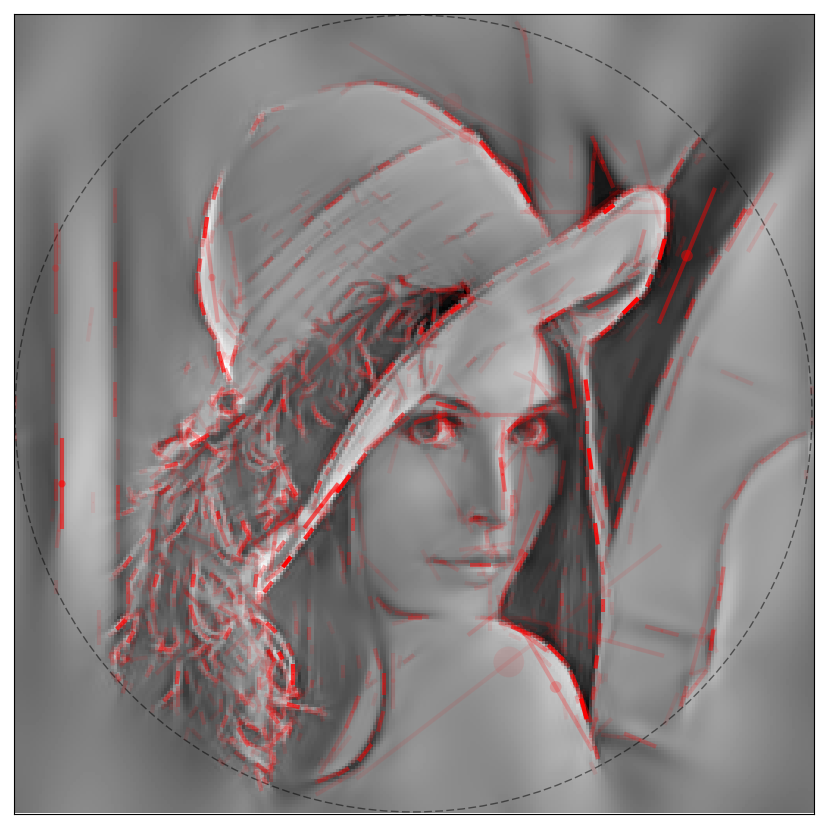

In [11]:
image_rec = mp.reconstruct(edges, mask=True)        
fig, a = mp.show_edges(edges, image=mp.dewhitening(image_rec), show_phase=False, mask=True)


Check out [this blog post](http://blog.invibe.net/posts/2015-05-22-a-hitchhiker-guide-to-matching-pursuit.html) to learn more about Matching Pursuit.

## more examples
First, some tests are available as separate notebooks:

In [12]:
from IPython.display import FileLink, FileLinks, Image
FileLinks('../notebooks', recursive=False)

../notebooks/
  .DS_Store
  debug.log
  experiment_test_parameters.py
  nb_synthesis.ipynb
  test-co-occurrences.ipynb
  test-parameters.ipynb
  test-SparseEdges.ipynb
  textured-noise.ipynb

[Back to top](#SparseEdges)

### Effect of parameters on edge extraction: image size


In [13]:
# TODO include figure

### Effect of parameters on edge extraction: filter parameters



In [14]:
# TODO include figure

As we test different parameters for the filters, we measured the gain in efficiency for the algorithm as the ratio of the code length to achieve $85\%$ of energy extraction relative to that for the default parameters (white bar). The average is computed on the same database of natural images and error bars denote the standard deviation of gain over the database. First, we studied the effect of the bandwidth of filters respectively in the $\textsf{(A)}$ spatial frequency and $\textsf{(B)}$ orientation spaces. The minimum is reached for the default parameters: this shows that default parameters provide an optimal compromise between the precision of filters in the frequency and position domains for this database. We may also compare pyramids with different number of filters.  Indeed, efficiency (in bits) is equal to the number of selected filters times the coding cost for the address of each edge in the pyramid.
We plot here the average gain in efficiency which shows an optimal compromise respectively for respectively $\textsf{(C)}$ the number of orientations and $\textsf{(D)}$ the number of spatial frequencies (scales). Note first that with more than 12 directions, the gain remains stable. Note also that a dyadic scale ratio (that is of 2) is efficient but that other solutions ---such as using the golden section $\phi$--- prove to be significantly more efficient, though the average gain is relatively small (inferior to $5\%$).

## some book keeping for the notebook

In [15]:
%load_ext watermark
%watermark

2016-12-07T13:13:29+01:00

CPython 3.5.2
IPython 5.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)
system     : Darwin
release    : 16.1.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [16]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.12.0b1
scipy 0.18.1
matplotlib 2.0.0rc1
sympy 1.0
Wed Dec 07 13:13:30 2016 CET

In [18]:
%cd -q ..